In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from sklearn.decomposition import PCA

# Initial Data Reading and Analysis

In [2]:
# Read in the data and look at all the columns
data = pd.read_csv('data/train.csv')


print(data.columns)
relevant_columns = ['crew', 'time', 'seat', 'eeg_fp1', 'eeg_f7',
       'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1',
       'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4',
       'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event']
data = data[relevant_columns]
data.head()

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')


,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,23.712299,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,21.010300,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,25.431801,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,19.142799,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,20.572100,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [3]:
# Analyze the datatypes and counts for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 27 columns):
 #   Column   Dtype  
---  ------   -----  
 0   crew     int64  
 1   time     float64
 2   seat     int64  
 3   eeg_fp1  float64
 4   eeg_f7   float64
 5   eeg_f8   float64
 6   eeg_t4   float64
 7   eeg_t6   float64
 8   eeg_t5   float64
 9   eeg_t3   float64
 10  eeg_fp2  float64
 11  eeg_o1   float64
 12  eeg_p3   float64
 13  eeg_pz   float64
 14  eeg_f3   float64
 15  eeg_fz   float64
 16  eeg_f4   float64
 17  eeg_c4   float64
 18  eeg_p4   float64
 19  eeg_poz  float64
 20  eeg_c3   float64
 21  eeg_cz   float64
 22  eeg_o2   float64
 23  ecg      float64
 24  r        float64
 25  gsr      float64
 26  event    object 
dtypes: float64(24), int64(2), object(1)
memory usage: 1002.7+ MB


In [4]:
# Check the unique counts of each column
data.nunique()

crew             9
time        483534
seat             2
eeg_fp1    2427007
eeg_f7     2394309
eeg_f8     2379512
eeg_t4     2347643
eeg_t6     2308226
eeg_t5     2325976
eeg_t3     2356767
eeg_fp2    2416326
eeg_o1     2276966
eeg_p3     2270474
eeg_pz     2383905
eeg_f3     2472944
eeg_fz     2371405
eeg_f4     2423606
eeg_c4     2310968
eeg_p4     2268197
eeg_poz    2245716
eeg_c3     2312641
eeg_cz     2292542
eeg_o2     2266411
ecg         516599
r           165011
gsr         407838
event            4
dtype: int64

In [5]:
# Remove NANs from the data
print(data.isnull().sum())
data = data.dropna()
data.isnull().sum()

crew       0
time       0
seat       0
eeg_fp1    0
eeg_f7     0
eeg_f8     0
eeg_t4     0
eeg_t6     0
eeg_t5     0
eeg_t3     0
eeg_fp2    0
eeg_o1     0
eeg_p3     0
eeg_pz     0
eeg_f3     0
eeg_fz     0
eeg_f4     0
eeg_c4     0
eeg_p4     0
eeg_poz    0
eeg_c3     0
eeg_cz     0
eeg_o2     0
ecg        0
r          0
gsr        0
event      0
dtype: int64


crew       0
time       0
seat       0
eeg_fp1    0
eeg_f7     0
eeg_f8     0
eeg_t4     0
eeg_t6     0
eeg_t5     0
eeg_t3     0
eeg_fp2    0
eeg_o1     0
eeg_p3     0
eeg_pz     0
eeg_f3     0
eeg_fz     0
eeg_f4     0
eeg_c4     0
eeg_p4     0
eeg_poz    0
eeg_c3     0
eeg_cz     0
eeg_o2     0
ecg        0
r          0
gsr        0
event      0
dtype: int64

In [6]:
# Check for duplicated data
data[data.duplicated()]

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event


In [7]:
# Analyze the statistics of the data columns
continuous_columns = ['eeg_fp1', 'eeg_f7',
       'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1',
       'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4',
       'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2']
continuous_data = data[continuous_columns]

print(continuous_data.describe())

            eeg_fp1        eeg_f7        eeg_f8        eeg_t4        eeg_t6  \
count  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   3.746336e+00  1.360002e+00  1.213644e+00  7.350926e-02  7.845481e-02   
std    4.506763e+01  3.518923e+01  3.519242e+01  2.431472e+01  1.803932e+01   
min   -1.361360e+03 -1.581330e+03 -1.643950e+03 -1.516640e+03 -1.220510e+03   
25%   -9.200250e+00 -8.325150e+00 -8.767610e+00 -7.367240e+00 -6.102000e+00   
50%    3.819020e-01  4.264100e-02  1.140390e-01  0.000000e+00  0.000000e+00   
75%    1.030610e+01  8.753340e+00  9.282560e+00  7.437780e+00  6.176630e+00   
max    1.972240e+03  2.048790e+03  2.145710e+03  1.731880e+03  9.009370e+02   

             eeg_t5        eeg_t3       eeg_fp2        eeg_o1        eeg_p3  \
count  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   8.675488e-02  2.299909e-01  3.627284e+00  1.836475e-01  2.650569e-01   
std    1.832606e+01  2.531132e+01  4.615674e+01  2.

In [8]:
# Remove outliers in the data via mean imputation
for col in continuous_columns:
    threshold1 = continuous_data[col].quantile(.95)
    threshold2 = continuous_data[col].quantile(.05)
    mean = continuous_data[col].mean()
    continuous_data.loc[:, col] = [val if val <= threshold1 and val >= threshold2 else mean for val in continuous_data[col]]

# Visualizations

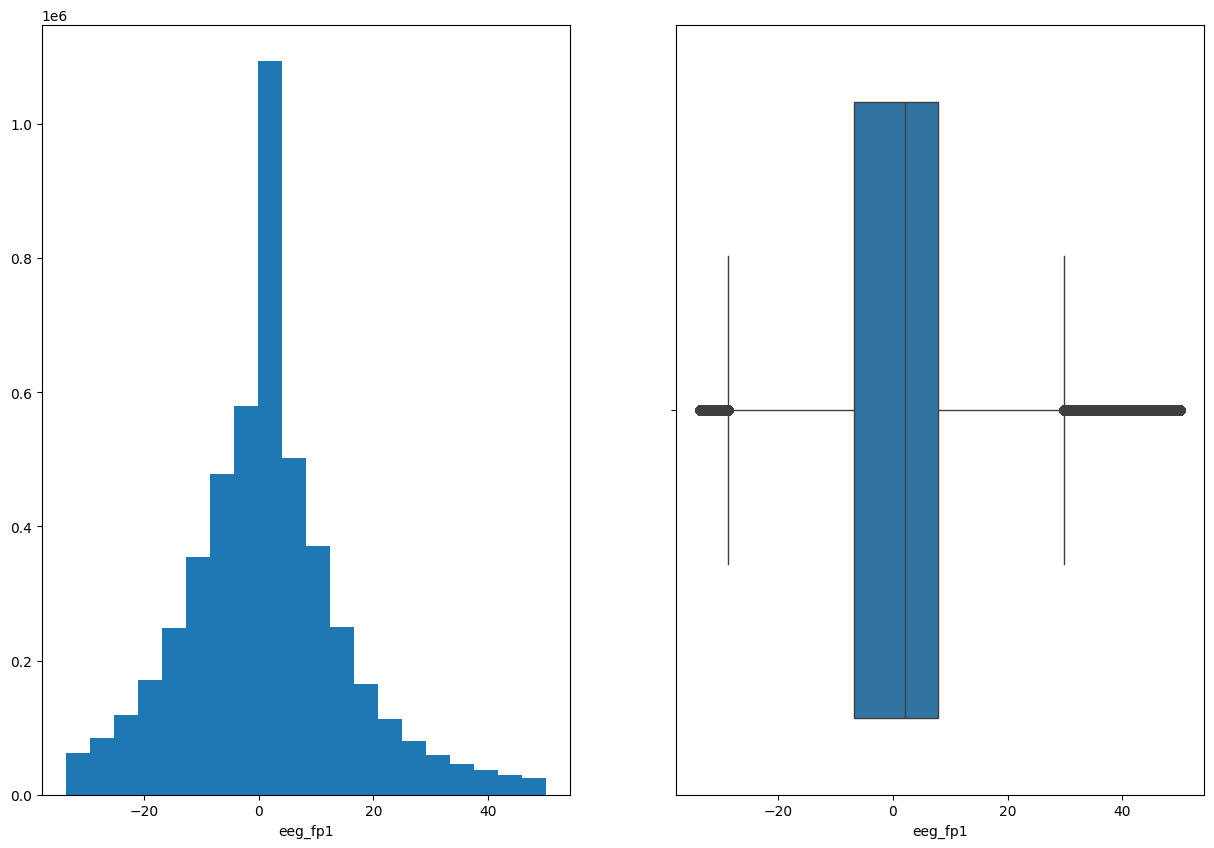

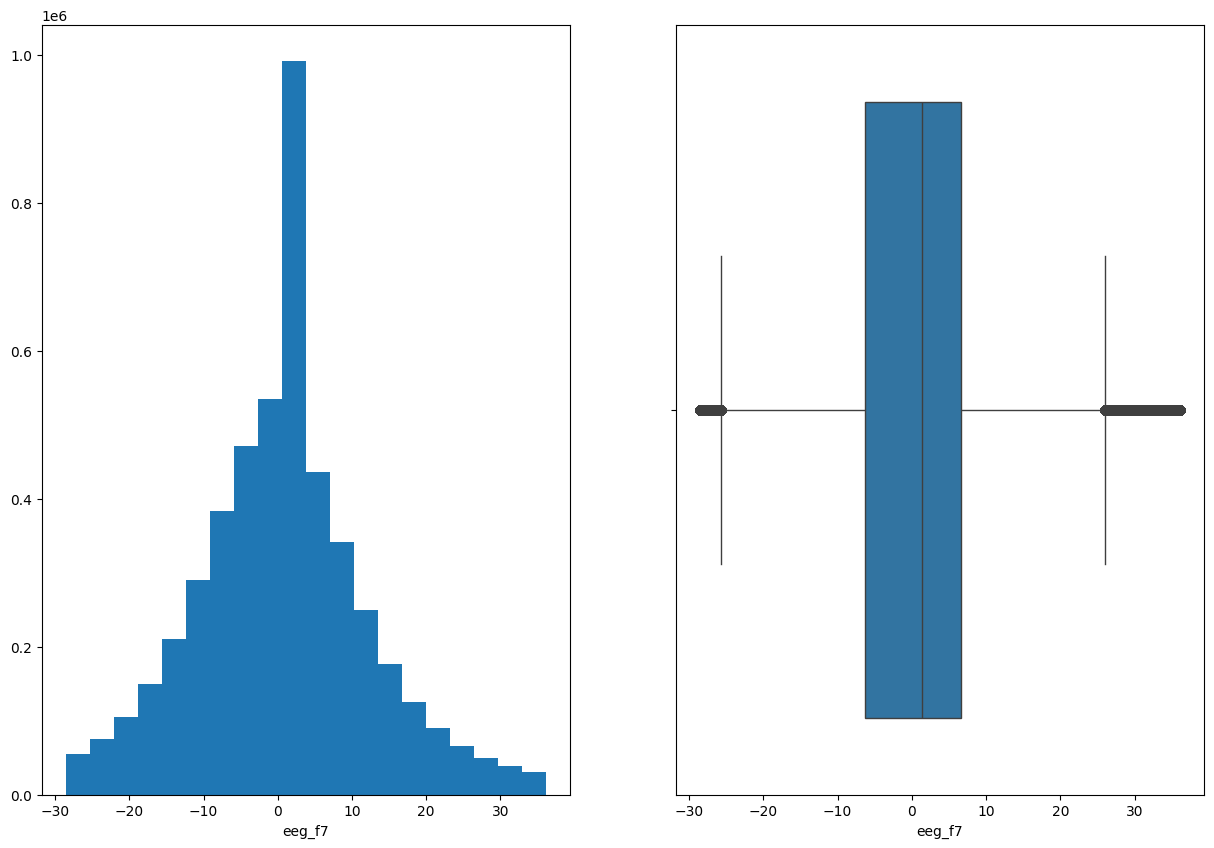

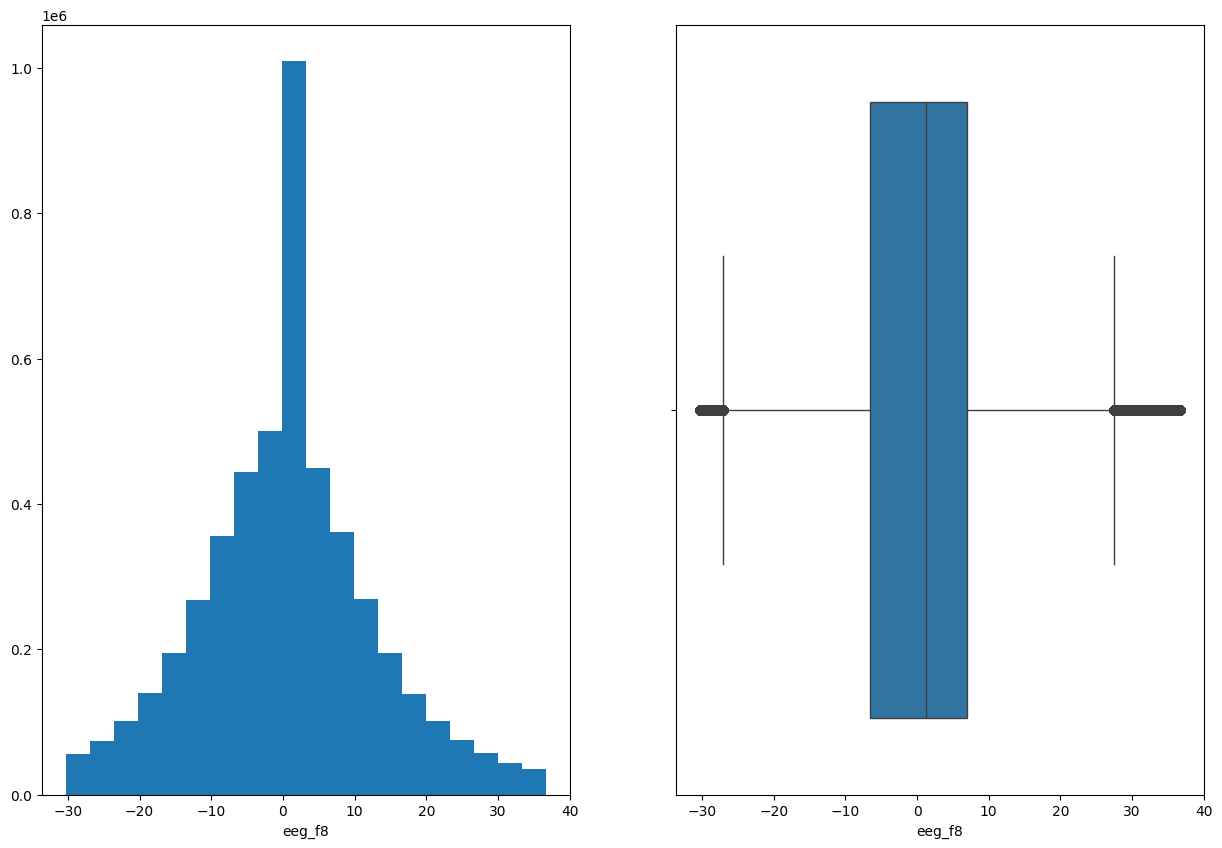

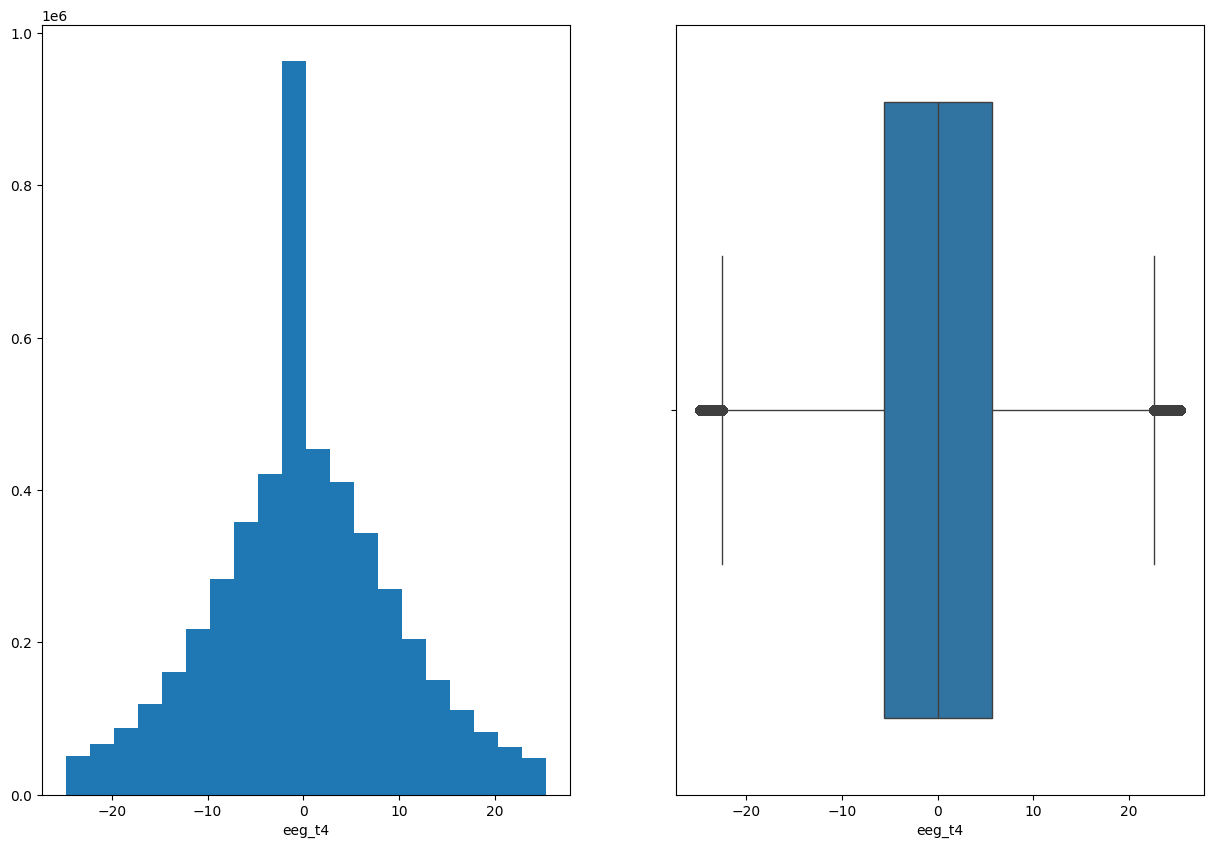

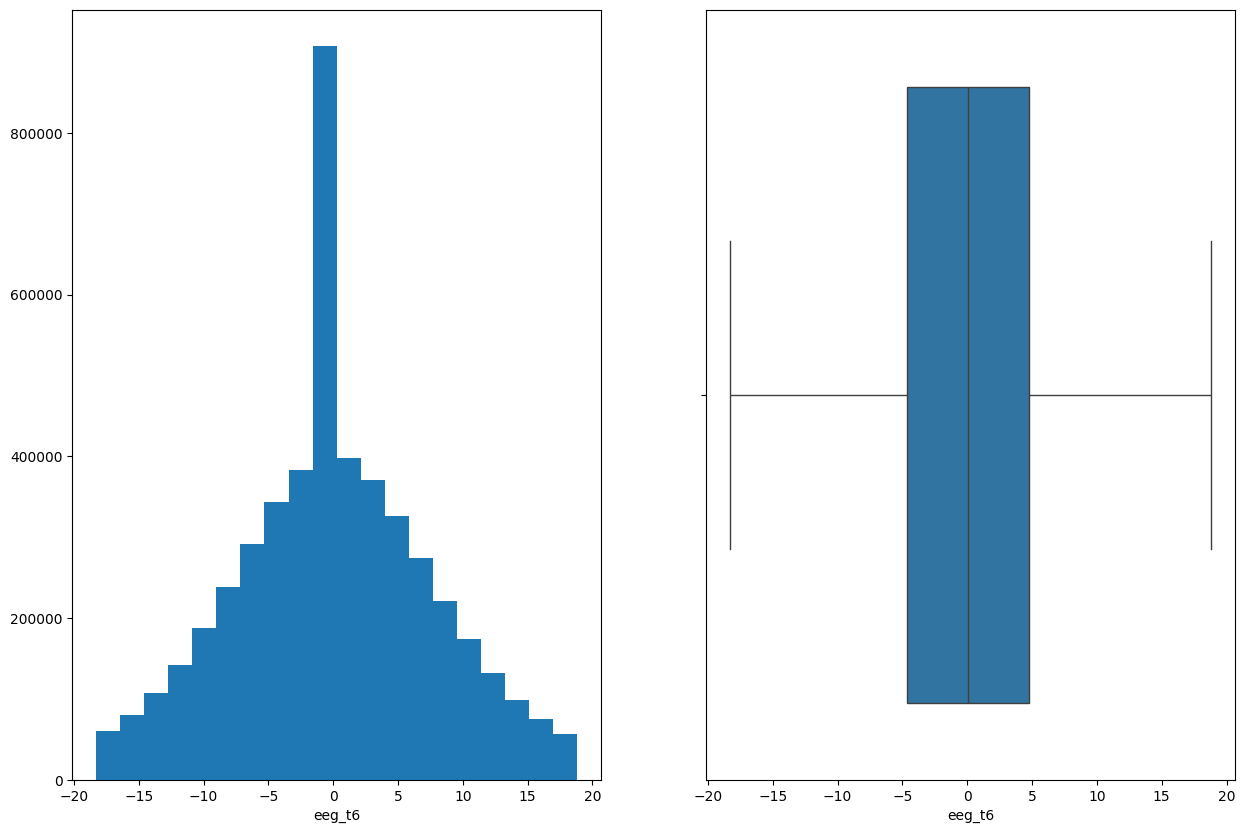

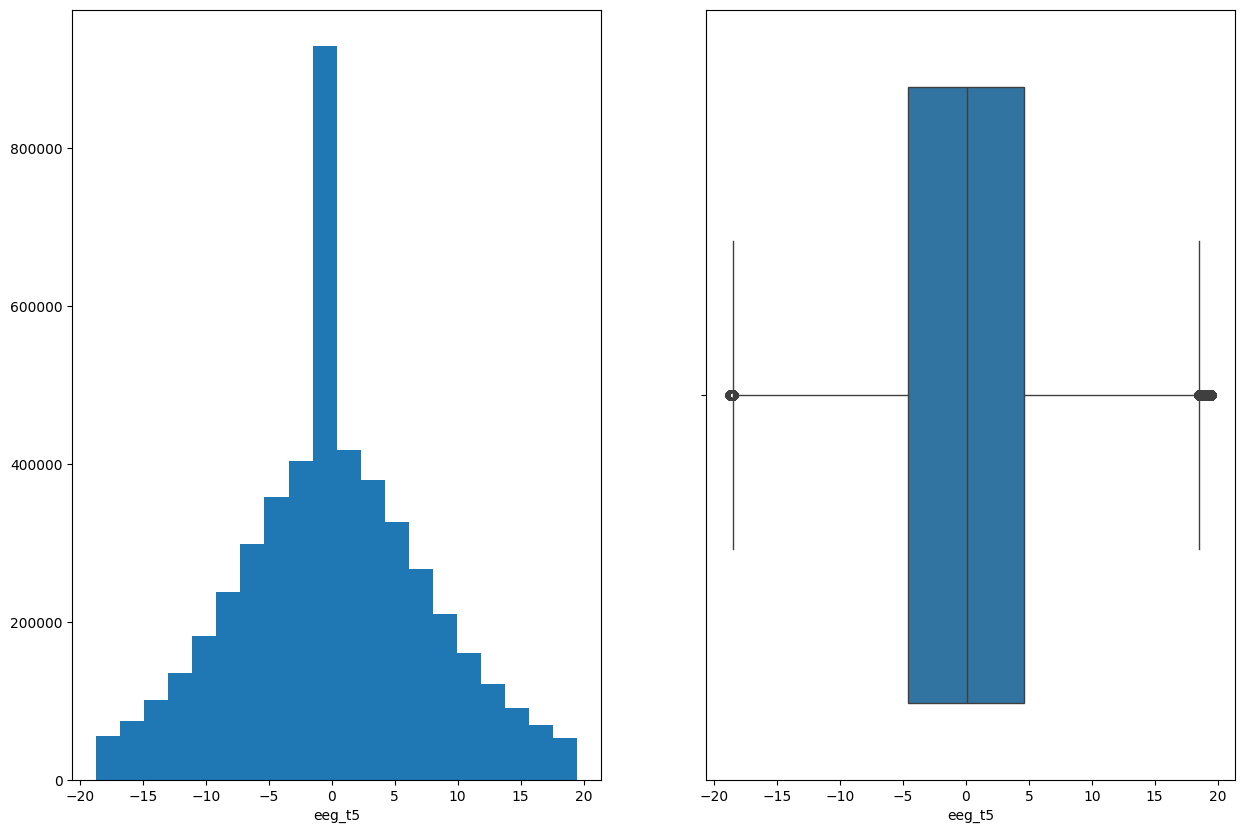

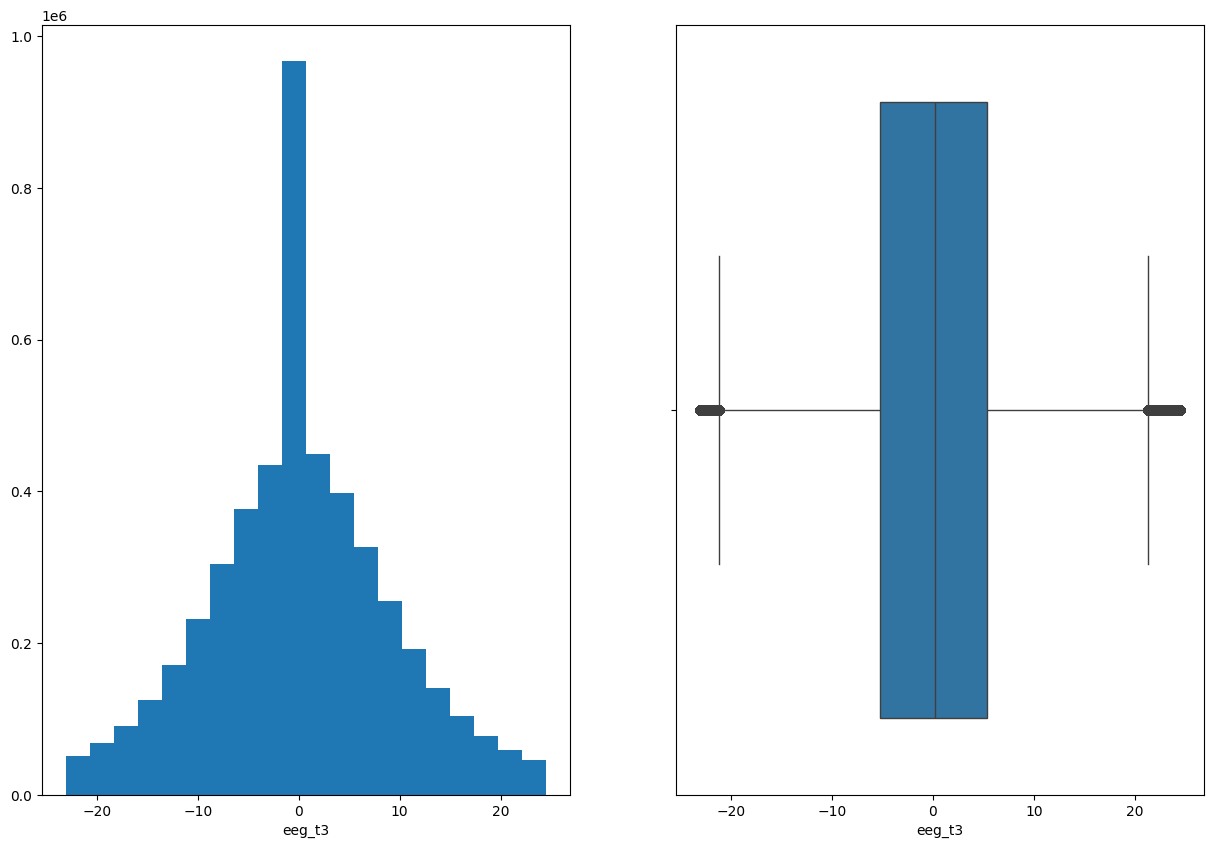

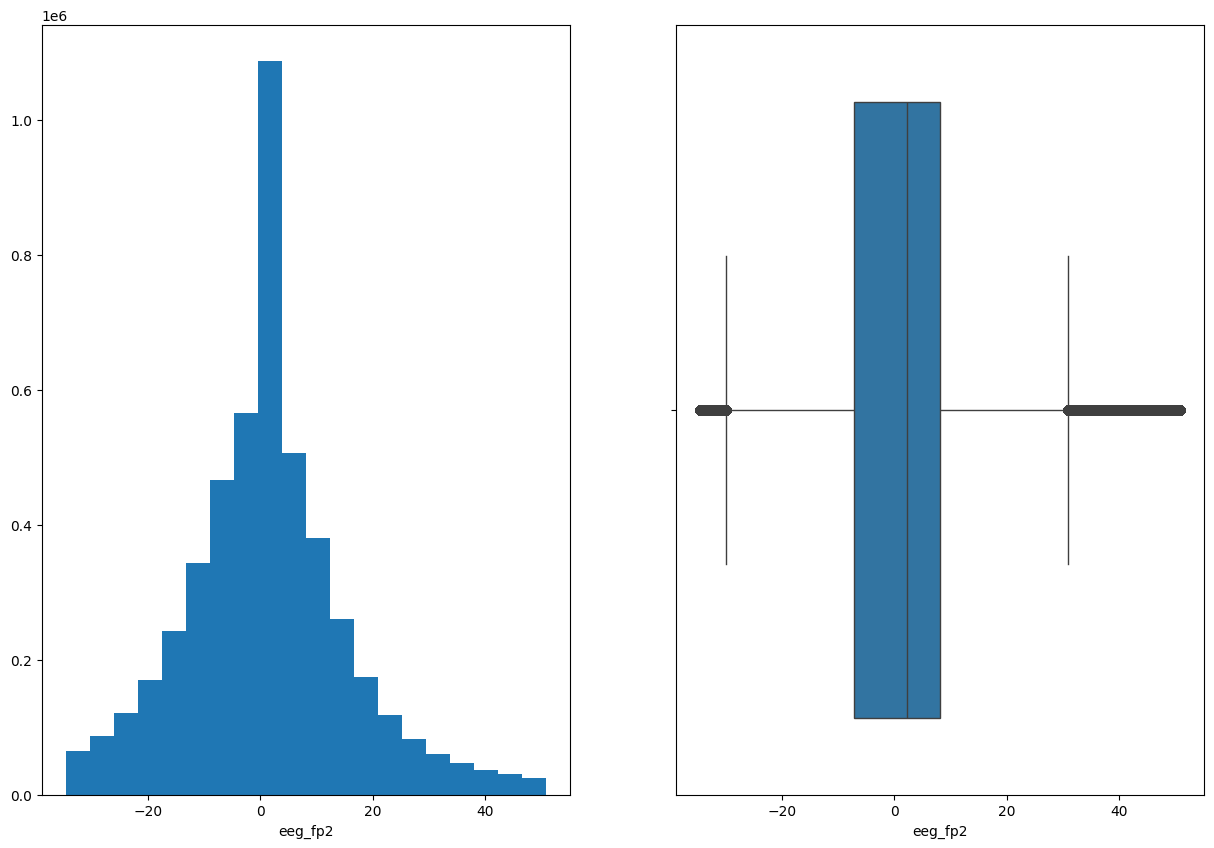

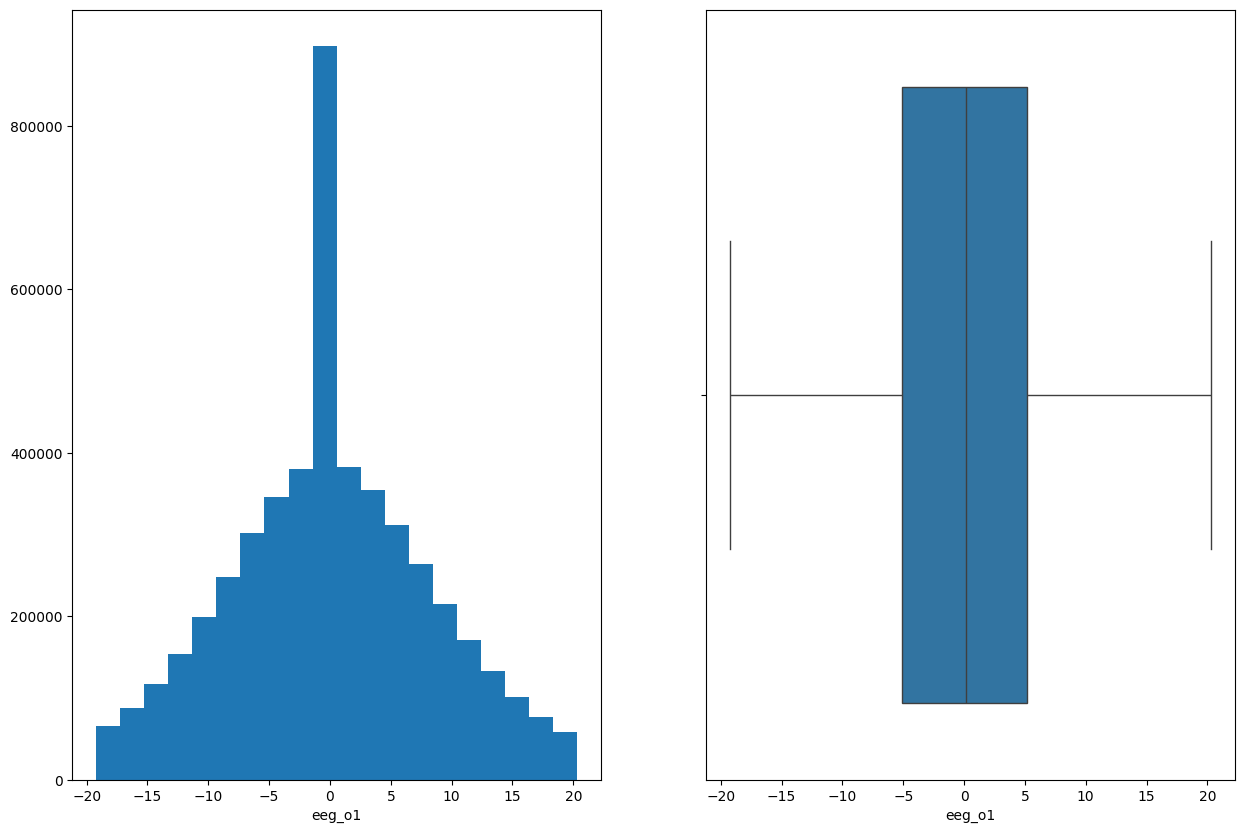

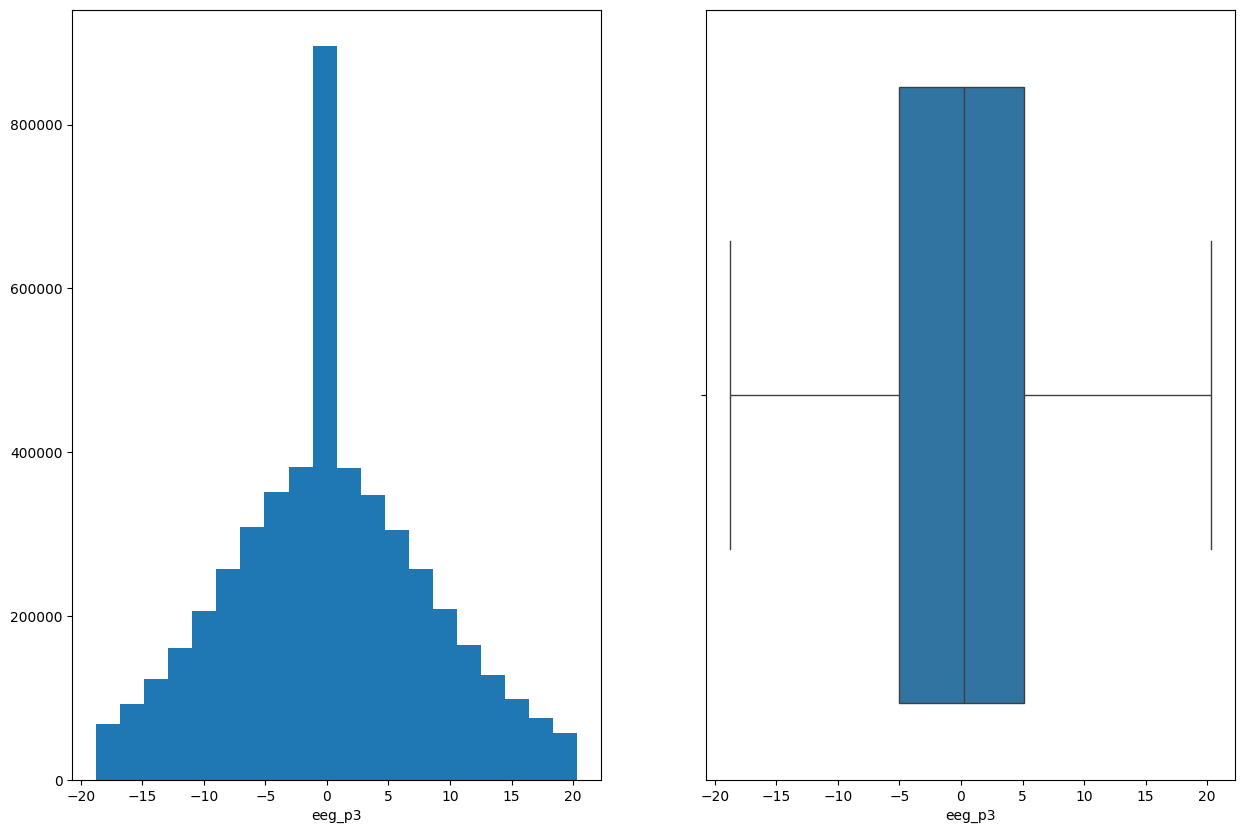

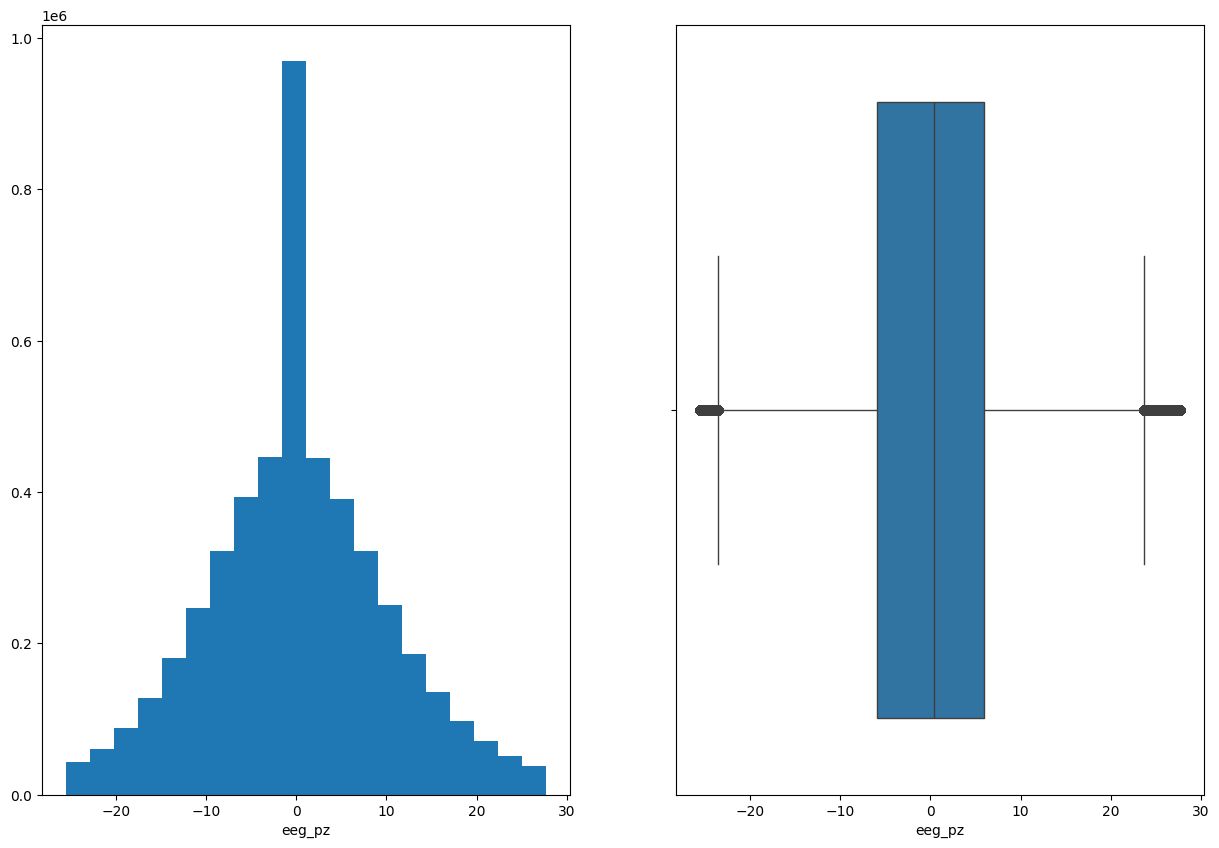

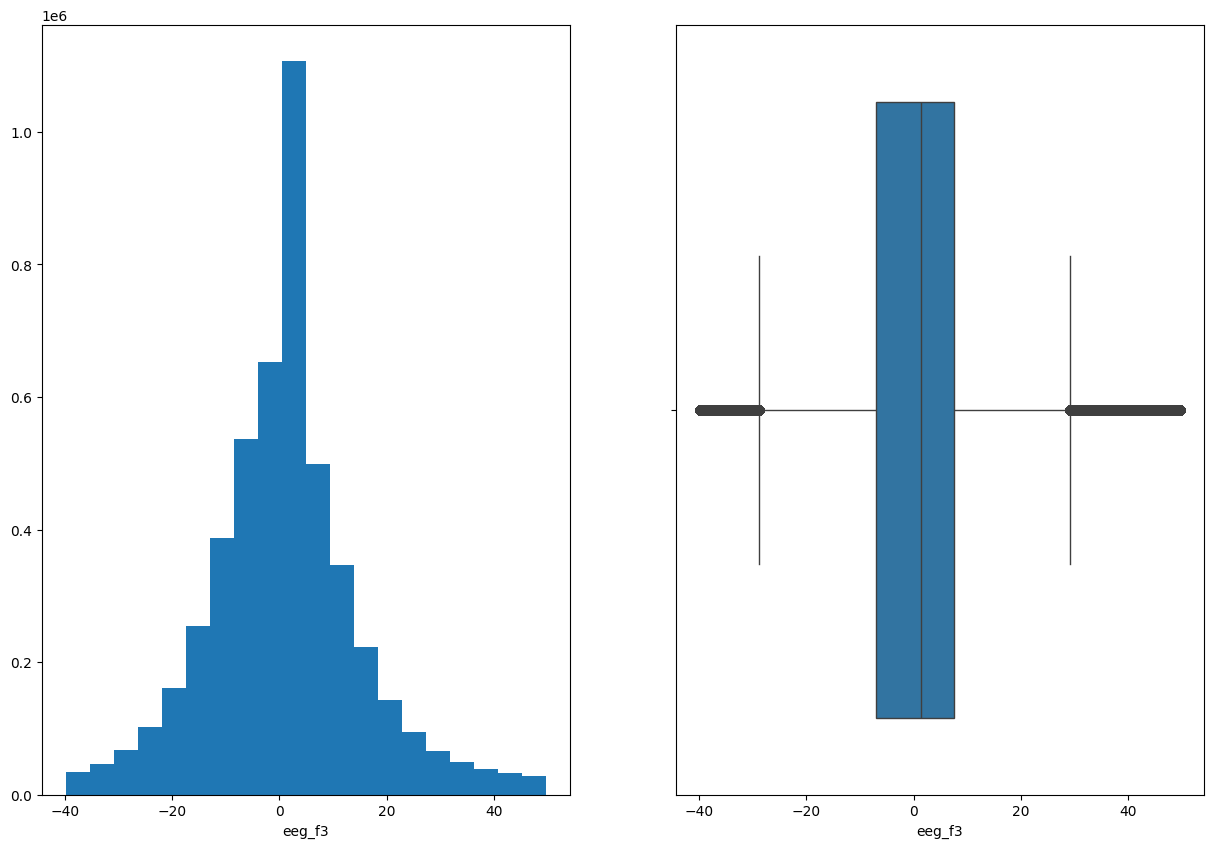

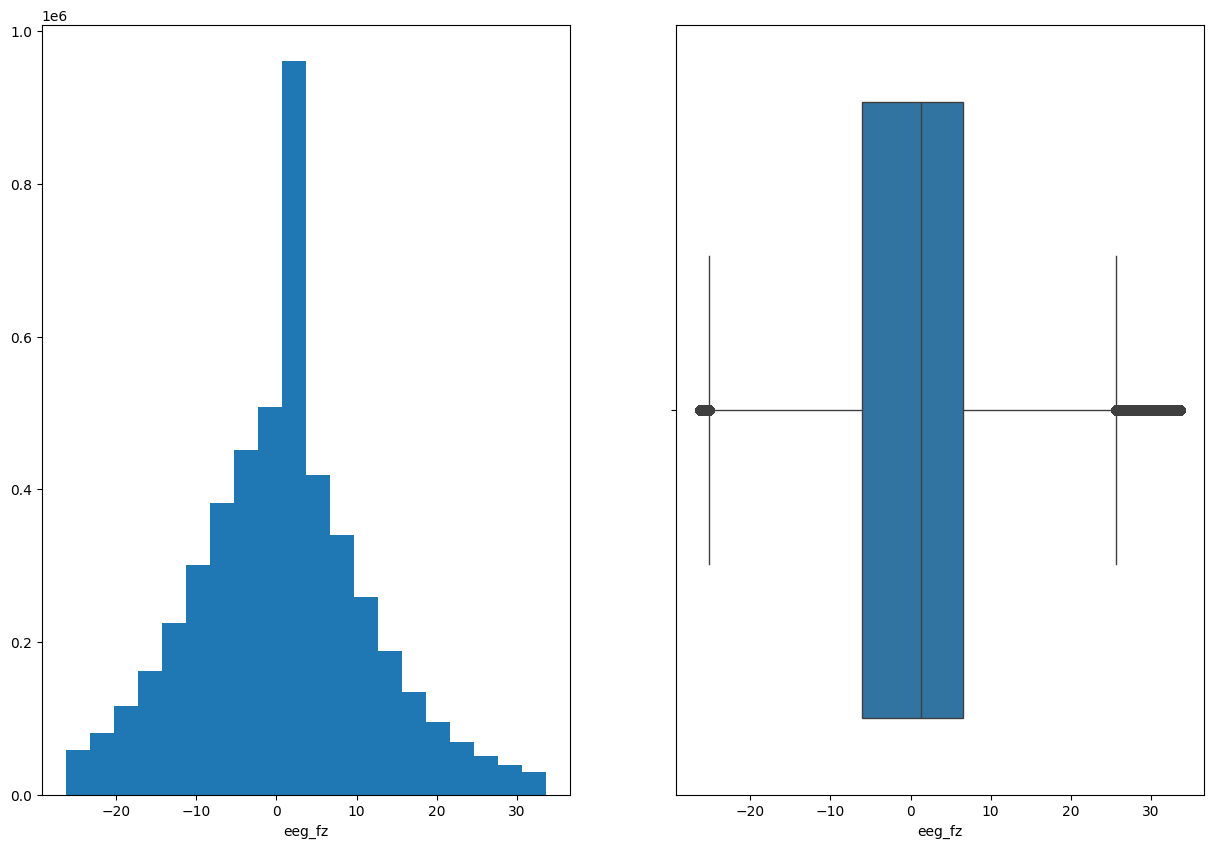

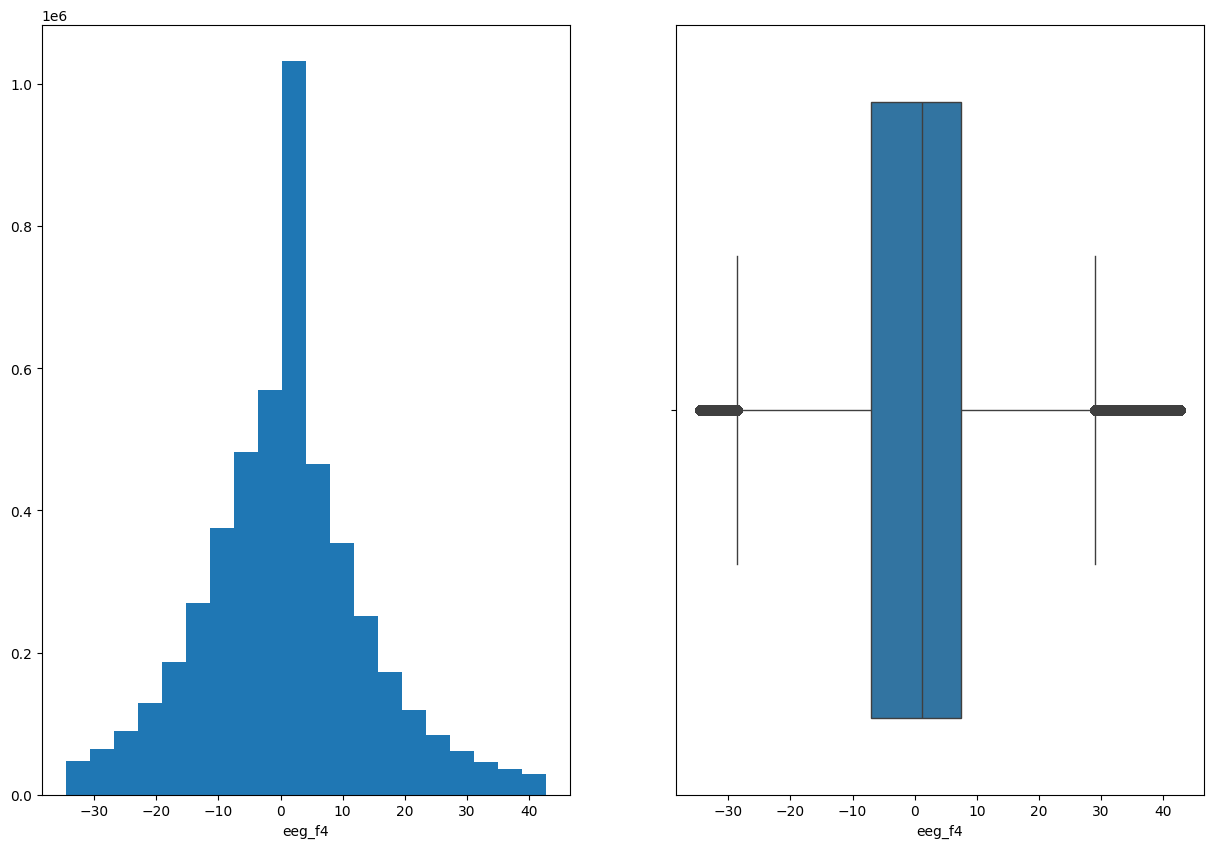

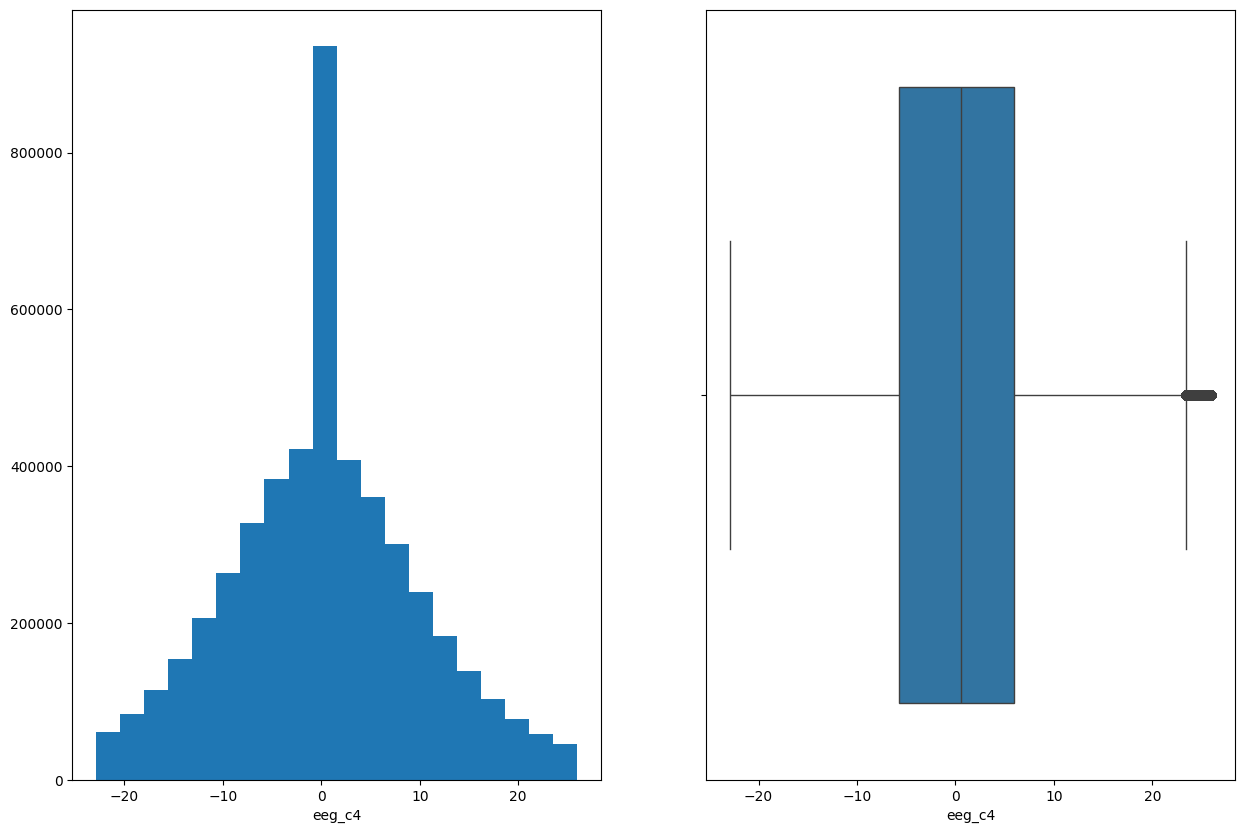

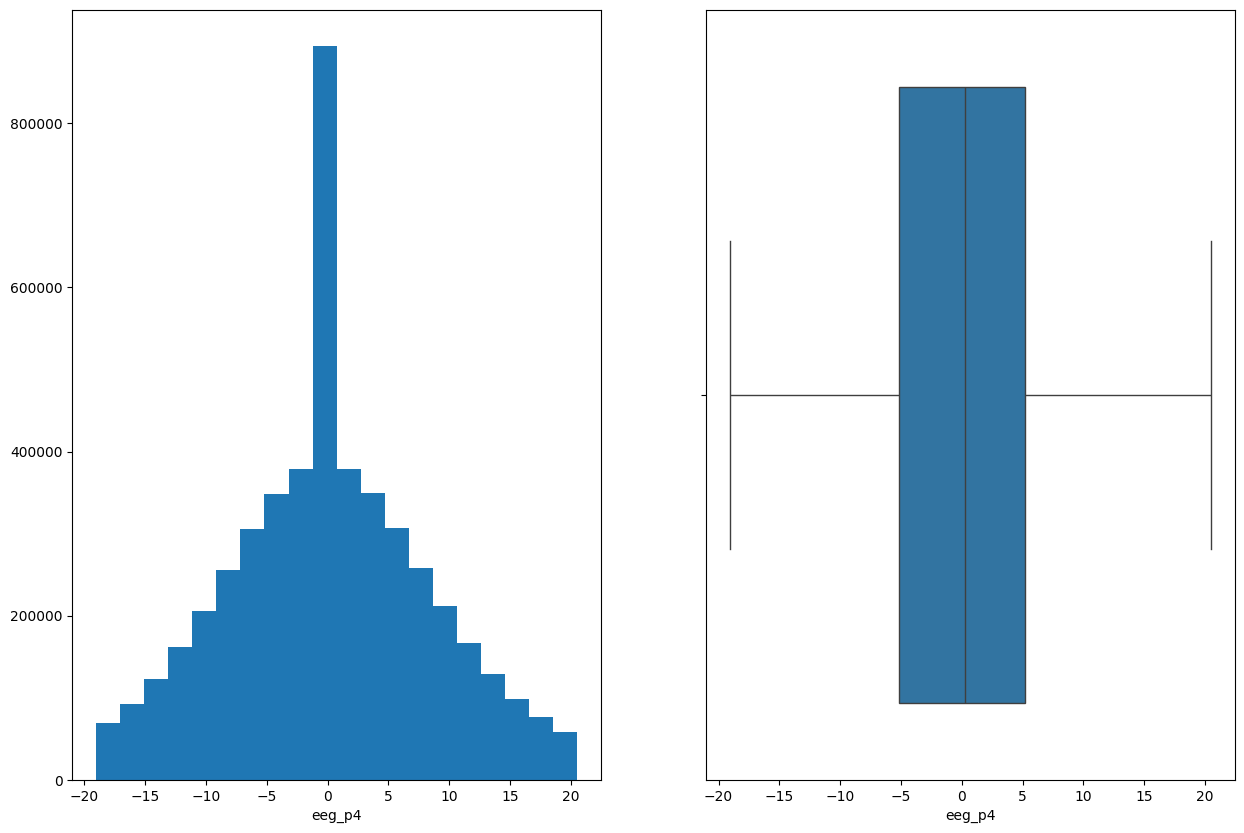

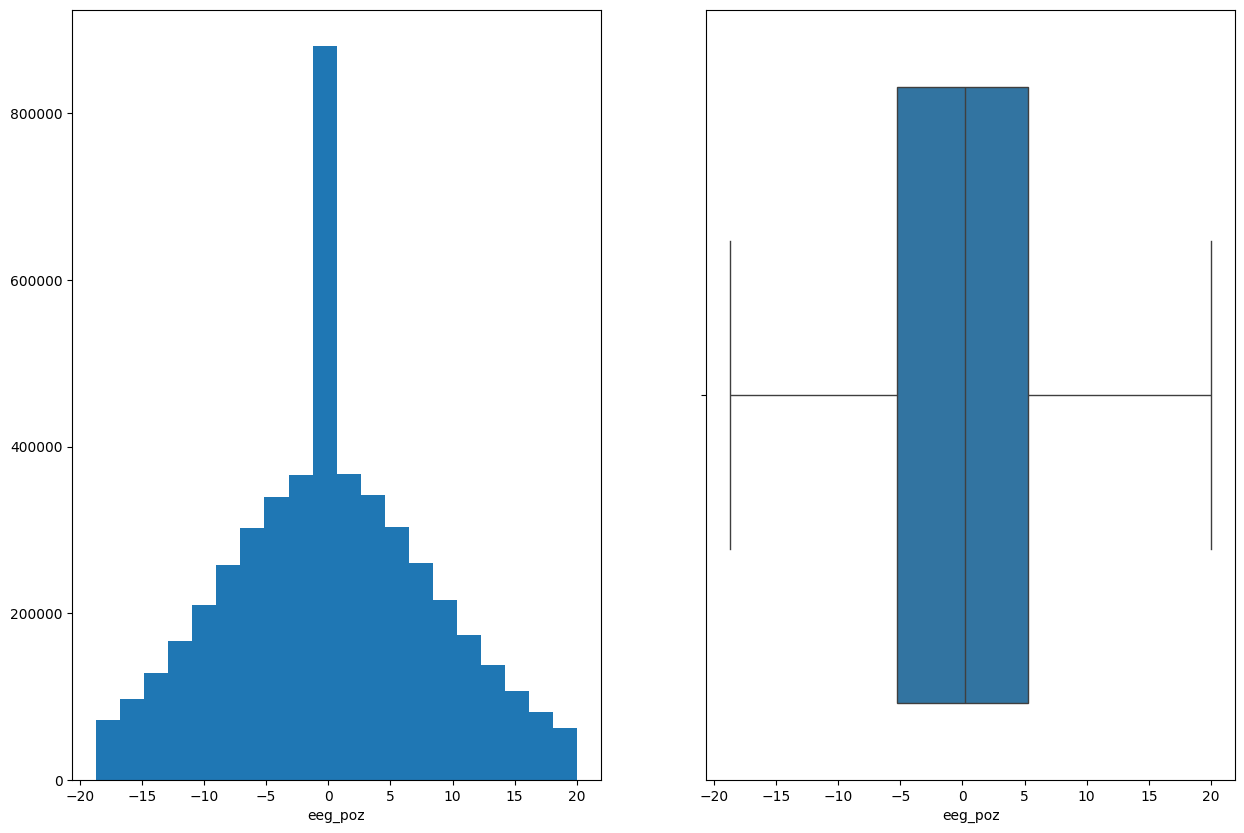

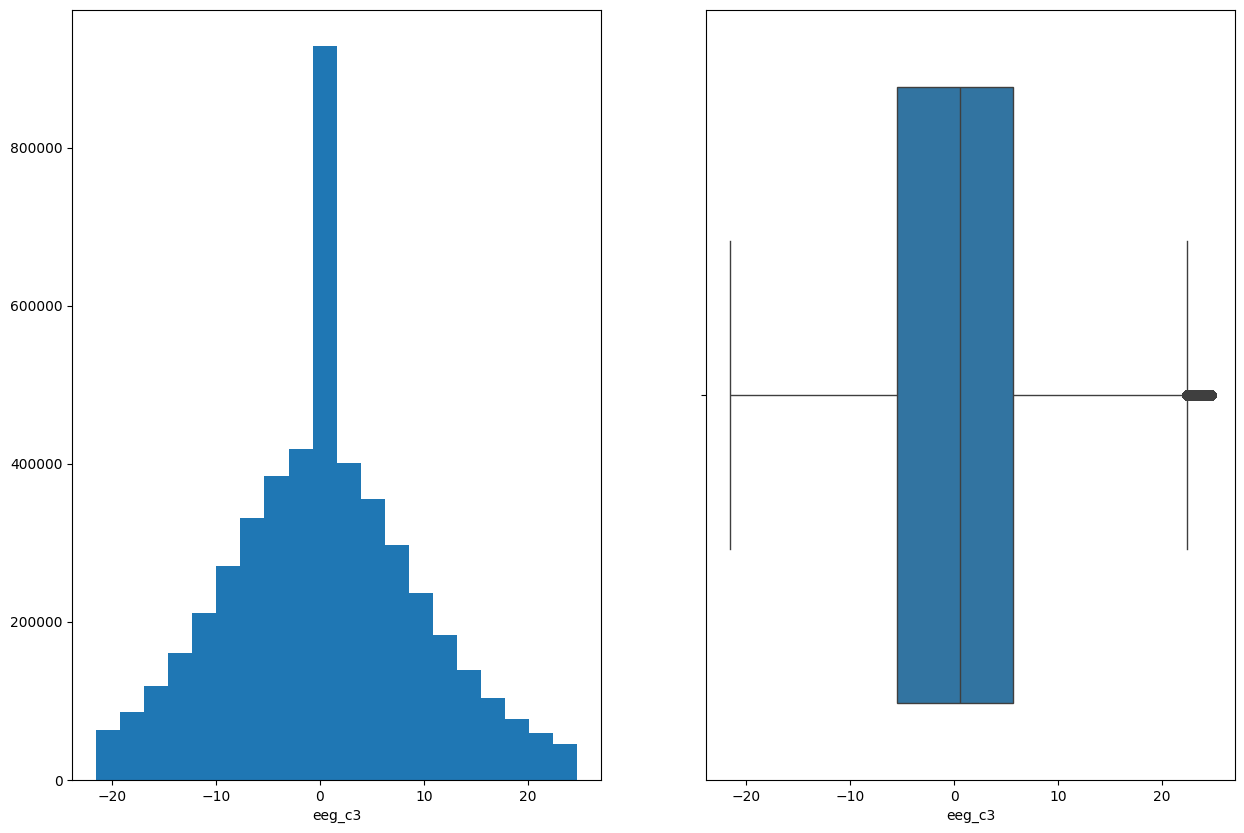

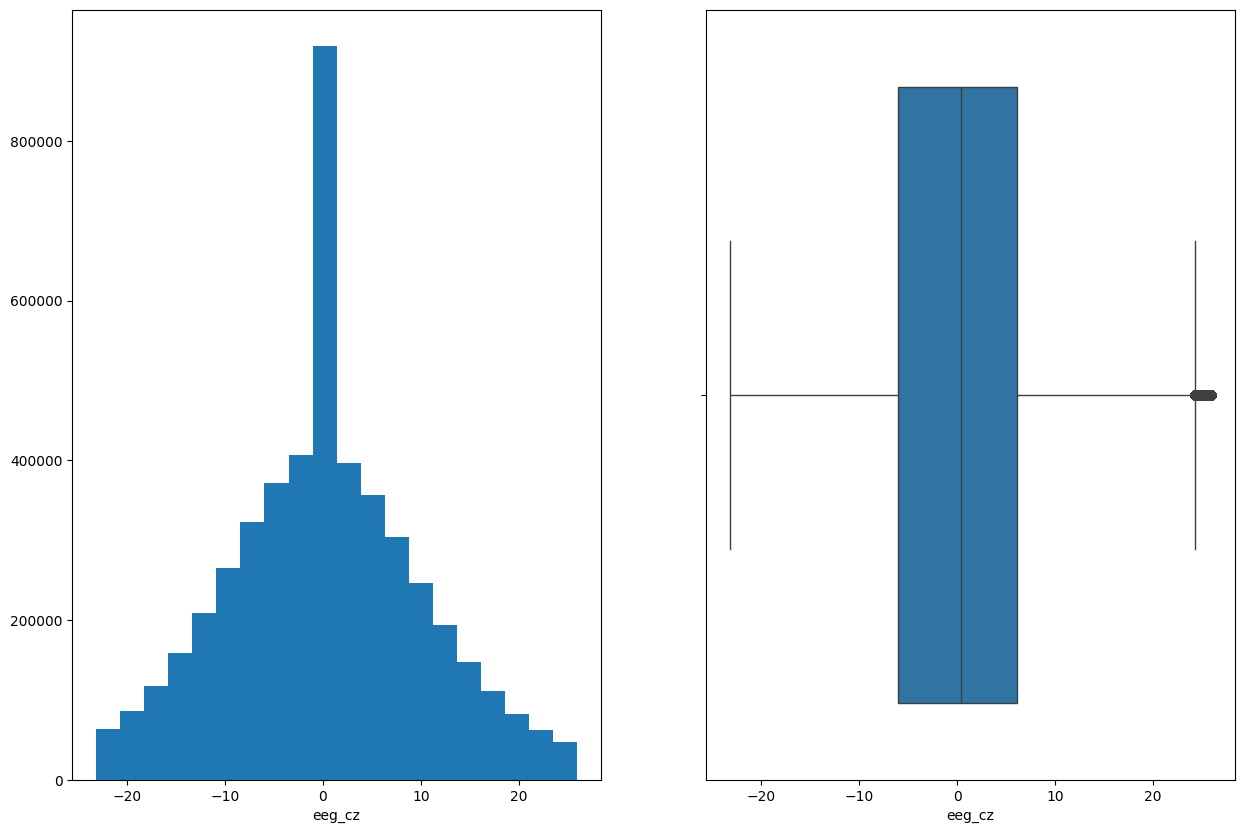

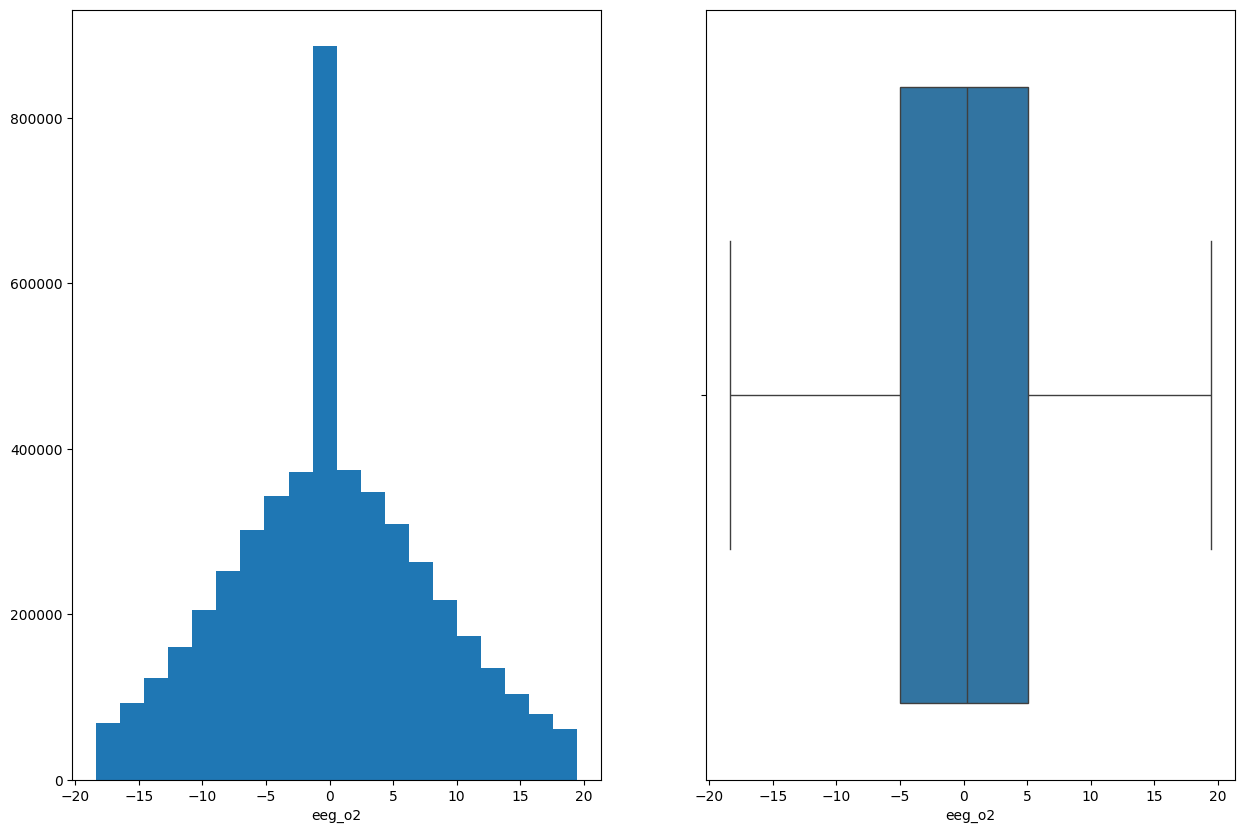

In [11]:
for col in continuous_data.columns:

    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    plt.hist(continuous_data[col], bins=20)
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=continuous_data[col])
    plt.show()

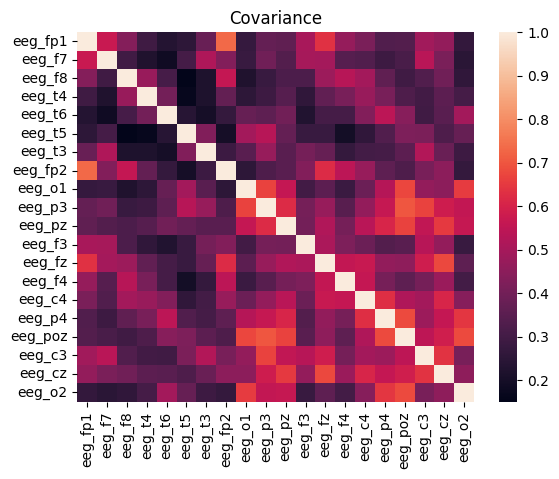

In [12]:
##### plt.figure(figsize=(10,10))
sns.heatmap(continuous_data.corr())
plt.title('Covariance')
plt.show()

<Figure size 1500x1500 with 0 Axes>

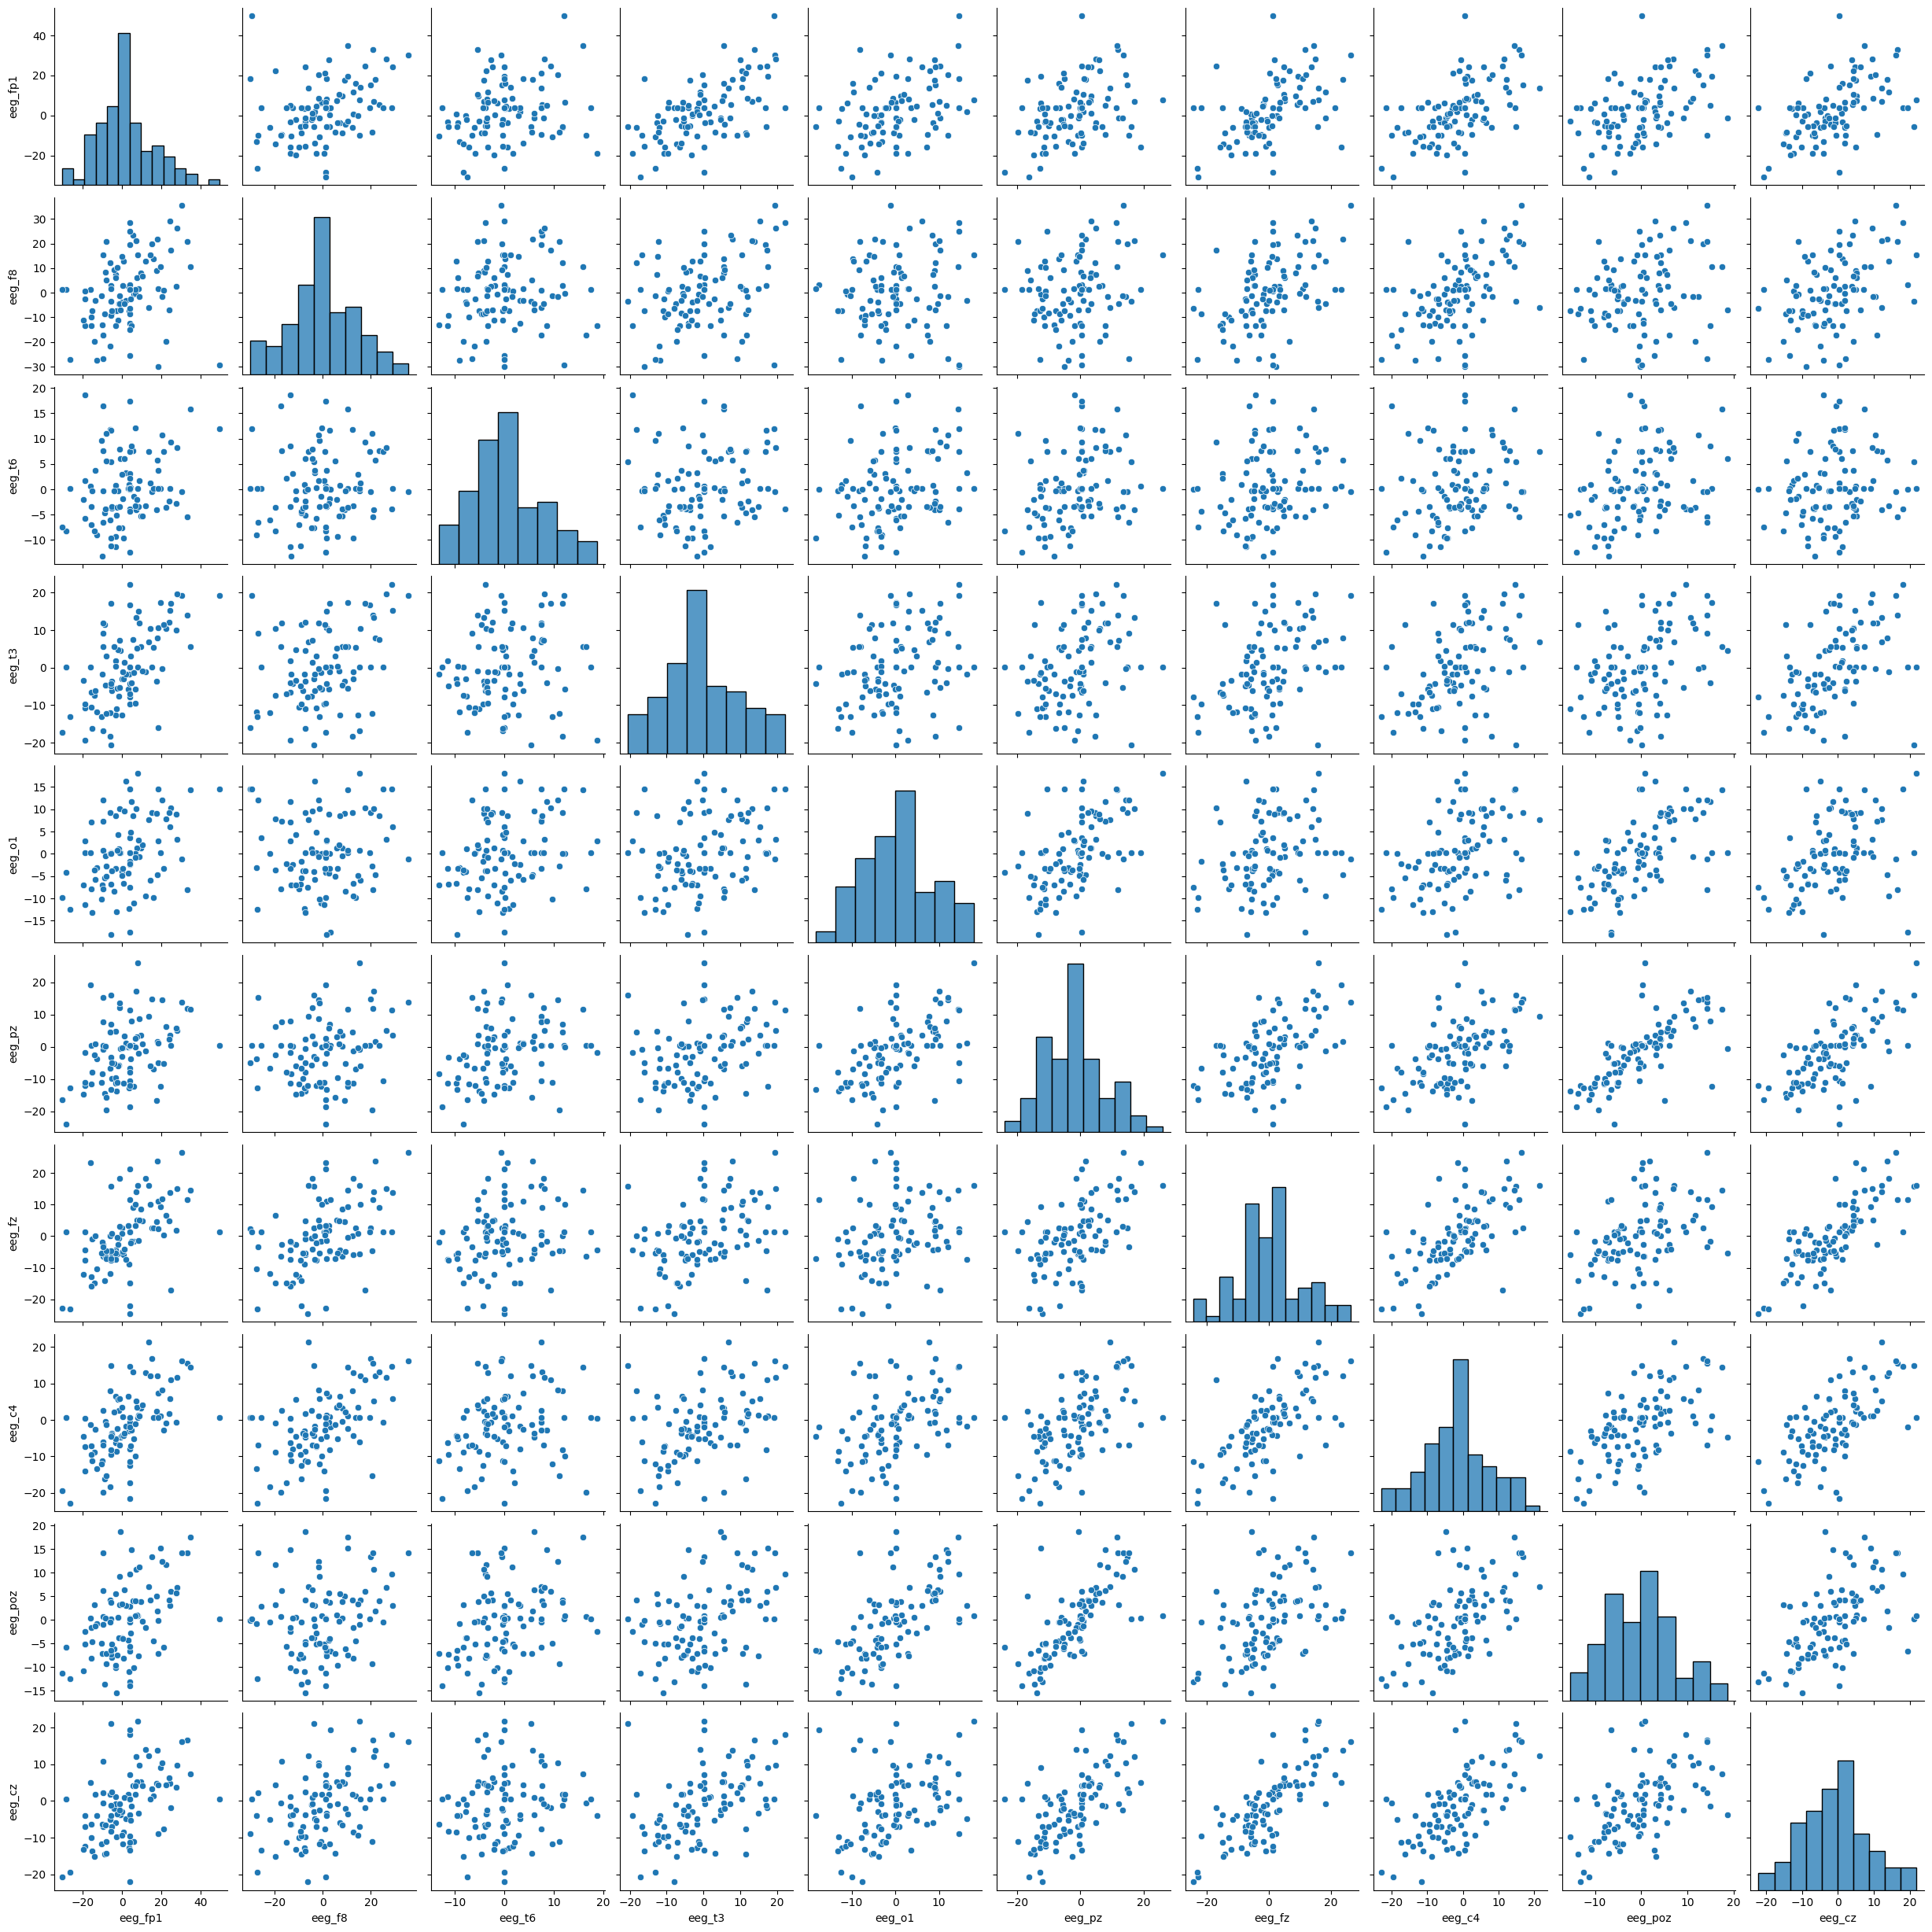

In [13]:
plt.figure(figsize=(15,15))
selected_columns = [continuous_columns[i] if i % 2 == 0 else '' for i in range(len(continuous_columns))]
selected_columns = list(filter(lambda x: x != "", selected_columns))
sns.pairplot(continuous_data[selected_columns].sample(100))

# Analysis of Target Variable

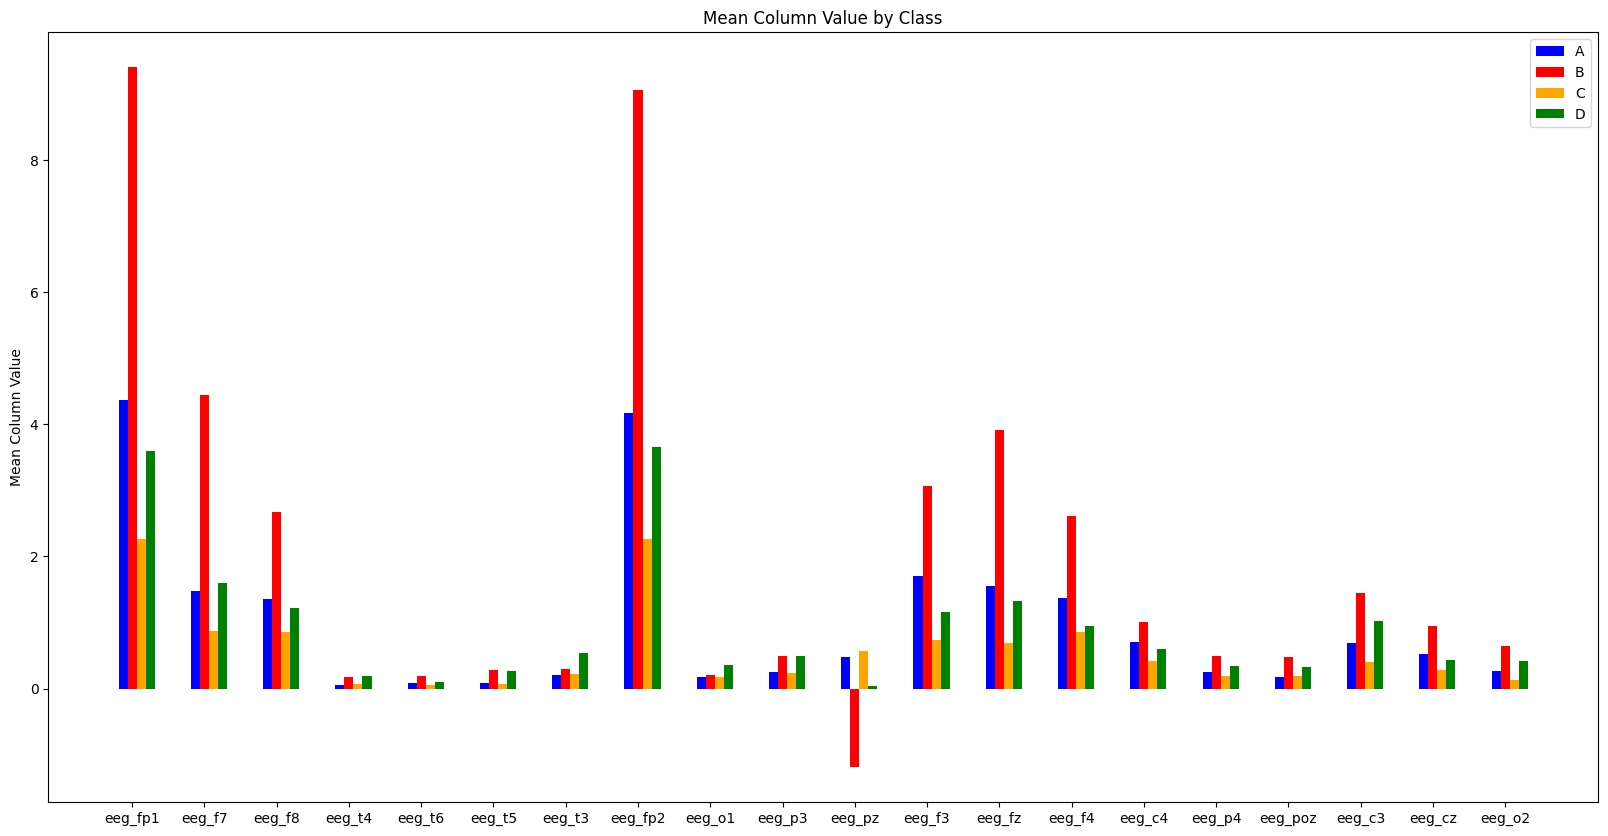

In [32]:
# Comparing class distributions
plt.figure(figsize=(20,10))

targets = data['event']
inputs = data.drop(['event'], axis=1)

eeg_cols = list(filter(lambda x: x != '', [col if col.startswith('eeg') else '' for col in inputs.columns]))

classes = sorted(targets.unique())
ind = np.arange(len(eeg_cols)) * len(classes)
width = .5
colors = ['blue', 'red', 'orange', 'green']

bars = []
for i in range(len(classes)):
    c = classes[i]

    index = targets[targets == c].index
    inputs_c = inputs[eeg_cols].iloc[index]

    bars.append(plt.bar(ind + (width * i), inputs_c.mean().to_numpy(), width, color=colors[i], label=c))
plt.xticks(ind+ width, eeg_cols)
plt.ylabel('Mean Column Value')
plt.title('Mean Column Value by Class')
plt.legend(bars, classes)

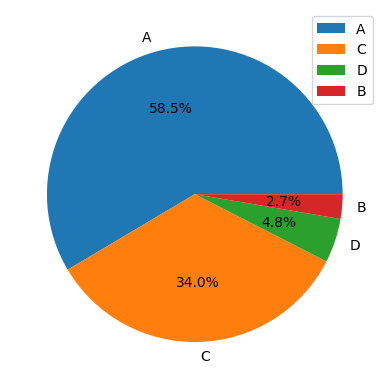

In [30]:
targets = data['event']

fig, ax = plt.subplots()
sizes = targets.value_counts().values

ax.pie(sizes, labels=targets.unique(), autopct='%1.1f%%')
plt.legend()

In [31]:
final_data = inputs
final_data['event'] = targets
final_data.to_csv('data/unbalanced_data.csv')

In [32]:
sampler = RandomUnderSampler()

y = []
for instance in targets:
    if instance == 'A':
        y.append([1, 0, 0, 0])
    elif instance == 'B':
        y.append([0, 1, 0, 0])
    elif instance == 'C':
        y.append([0, 0, 1, 0])
    else:
        y.append([0, 0, 0, 1])
y = np.array(y)
inputs = data.drop(['event'], axis=1)

X, y = sampler.fit_resample(inputs, y)

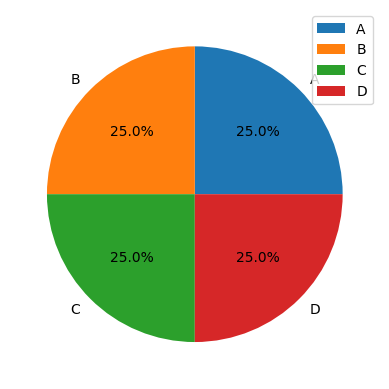

In [33]:
fig, ax = plt.subplots()

resampled_targets = []
for instance in y:
    if instance[0] == 1:
        resampled_targets.append('A')
    elif instance[1] == 1:
        resampled_targets.append('B')
    elif instance[2] == 1:
        resampled_targets.append('C')
    else:
        resampled_targets.append('D')
sizes = pd.Series(resampled_targets).value_counts().values

ax.pie(sizes, labels=np.unique(resampled_targets), autopct='%1.1f%%')
plt.legend()

In [34]:
# resampled_targets = pd.DataFrame({'event': resampled_targets})
final_data = X
samples = [sample[0] for sample in resampled_targets]
final_data['event'] = samples
final_data.to_csv('data/balanced_data.csv')

In [35]:
print(final_data.head())

         crew        time  seat    eeg_fp1    eeg_f7     eeg_f8     eeg_t4  \
3693767     7  298.299011     1  33.022999  10.67540  21.526899  26.035601   
4295260     8   65.042969     1   0.695641   7.78519  -7.069430 -14.254800   
3971231     8  137.570312     0  -6.523550   0.91154   5.015470   9.875400   
1481758     3  297.207031     0  18.622700 -10.57660  15.150600  11.946000   
3427251     7  152.652344     1  -9.479300  -4.47273  -9.147890  -1.128090   

            eeg_t6   eeg_t5    eeg_t3  ...    eeg_c4    eeg_p4    eeg_poz  \
3693767   0.551023  6.96384  10.51460  ...   2.85777 -0.189594  13.177700   
4295260 -15.235900 -4.30054  -3.04515  ...  -3.43239 -6.827820  -1.674960   
3971231   5.457310 -8.92143  -3.04243  ...   5.54653  5.090880  -0.631244   
1481758  10.757700  8.26449 -14.60250  ... -13.93500  5.332060  -1.350900   
3427251   3.293300 -3.87190  -6.57566  ...  -9.14721 -1.821420  -2.314170   

           eeg_c3    eeg_cz      eeg_o2           ecg           r  \

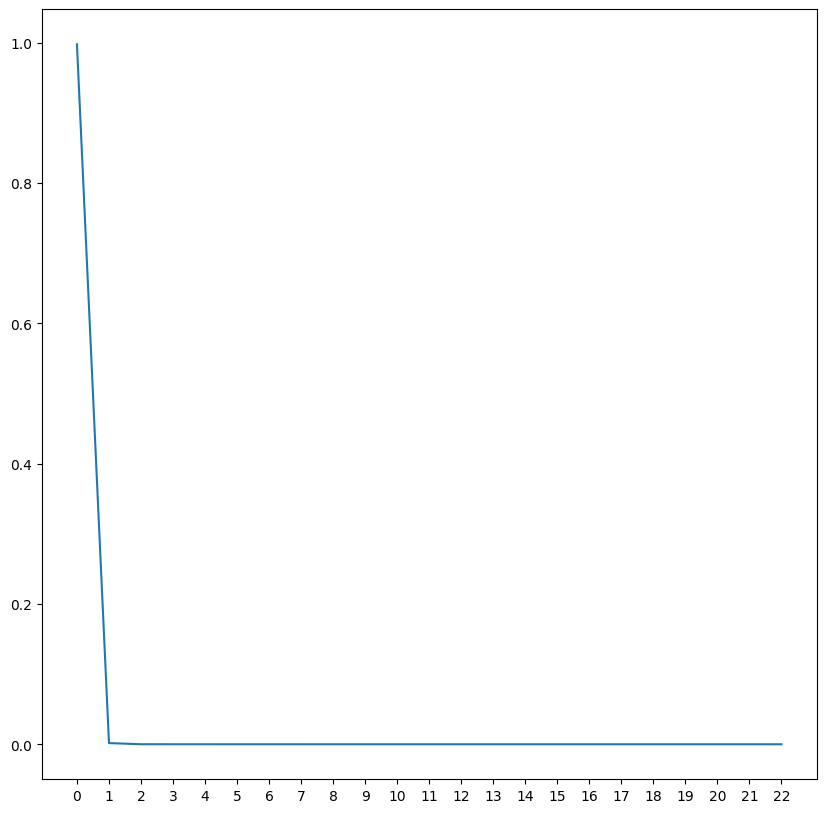

In [36]:
plt.figure(figsize=(10, 10))
components = X.drop(['event', 'crew', 'time', 'seat'], axis=1)
pca = PCA(n_components=len(components.columns))
components = pca.fit_transform(components)

plt.xticks(range(len(components[0])))
plt.plot(range(len(components[0])), pca.explained_variance_ratio_)